In [ ]:
!pip install pyxlsb

In [ ]:
# استيراد المكتبات اللازمة لتحليل البيانات وتمثيلها بصريًا
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 📌 1️⃣ تحميل البيانات من ملف XLSB باستخدام محرك pyxlsb
file_path = "stc TV Data Set_T1.xlsb"
datastc = pd.read_excel(file_path, sheet_name="Final_Dataset", engine="pyxlsb")

In [ ]:
datastc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Column1           1048575 non-null  int64 
 1   date_             1048575 non-null  int64 
 2   user_id_maped     1048575 non-null  int64 
 3   program_name      1048575 non-null  object
 4   duration_seconds  1048575 non-null  int64 
 5   program_class     1048575 non-null  object
 6   season            1048575 non-null  int64 
 7   episode           1048575 non-null  int64 
 8   program_desc      1034537 non-null  object
 9   program_genre     1048575 non-null  object
 10  series_title      1048575 non-null  int64 
 11  hd                1048575 non-null  int64 
 12  original_name     1048575 non-null  object
dtypes: int64(8), object(5)
memory usage: 104.0+ MB


In [ ]:
datastc.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
# 📌 2️⃣ التحقق من وجود قيم مفقودة في أي عمود

print(datastc.isnull().sum())

Column1                 0
date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        14038
program_genre           0
series_title            0
hd                      0
original_name           0
dtype: int64


In [ ]:
# 📌 3️⃣ معالجة القيم المفقودة في عمود 'program_desc' عن طريق استبدالها بنص "No Description"

datastc["program_desc"] = datastc["program_desc"].fillna("No Description")


In [ ]:
print(datastc.isnull().sum())  # لمعرفة عدد القيم المفقودة في كل عمود

Column1             0
date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_desc        0
program_genre       0
series_title        0
hd                  0
original_name       0
dtype: int64


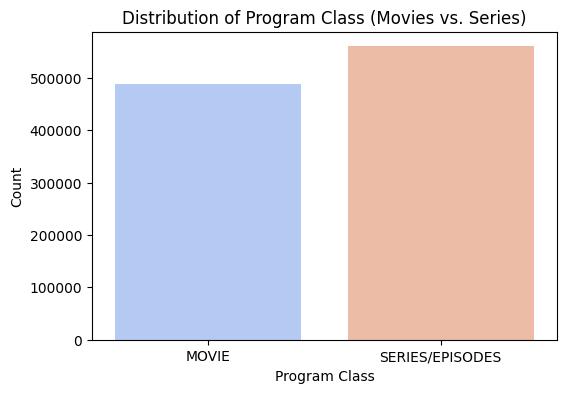

In [ ]:
# 📌 4️⃣ تحليل توزيع المشاهدات بناءً على نوع المحتوى (فيلم أو مسلسل)
plt.figure(figsize=(6, 4))
sns.countplot(x="program_class", data=datastc, hue="program_class", palette="coolwarm", legend=False)
plt.title("Distribution of Program Class (Movies vs. Series)")
plt.xlabel("Program Class")
plt.ylabel("Count")
plt.show()

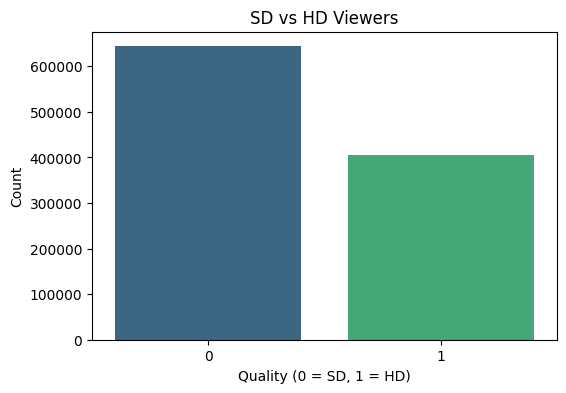

In [ ]:
# 📌 5️⃣ تحليل جودة المشاهدة (SD vs. HD)
plt.figure(figsize=(6, 4))
sns.countplot(x="hd", data=datastc, hue="hd", palette="viridis", legend=False)
plt.title("SD vs HD Viewers")
plt.xlabel("Quality (0 = SD, 1 = HD)")
plt.ylabel("Count")
plt.show()

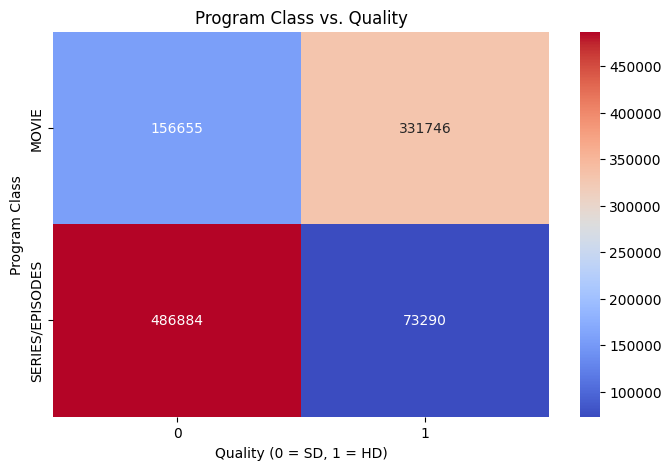

In [ ]:
# 📌 6️⃣ تحليل العلاقة بين جودة المشاهدة (SD/HD) ونوع المحتوى (فيلم/مسلسل)
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(datastc["program_class"], datastc["hd"]), annot=True, cmap="coolwarm", fmt="d")
plt.title("Program Class vs. Quality")
plt.xlabel("Quality (0 = SD, 1 = HD)")
plt.ylabel("Program Class")
plt.show()